In [2]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [52]:
# import csv file
df = pd.read_csv('ecommerce_furniture_dataset_2024.csv', encoding= 'unicode_escape')

In [53]:
df.shape

(2000, 5)

In [54]:
df.head()

,"ï»¿""productTitle""",originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [55]:
df.head(10)

,"ï»¿""productTitle""",originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...","$1,294.04",$123.4,53,Free shipping
6,5-Piece Patio Furniture Set Outdoor Couch with...,NaN,$198.31,1,Free shipping
7,"Living Room Furniture, Modern 3-Piece Includin...","$1,474.17",$734.58,5,Free shipping
8,TV Stand Dresser For Bedroom With 5 Fabric Dra...,NaN,$43.96,3,NaN
9,Outdoor Furniture Set 3 Pieces Wicker Patio Fu...,NaN,$233.3,0,Free shipping


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ï»¿"productTitle"  2000 non-null   object
 1   originalPrice      487 non-null    object
 2   price              2000 non-null   object
 3   sold               2000 non-null   int64 
 4   tagText            1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [57]:
pd.isnull(df).sum()

ï»¿"productTitle"       0
originalPrice        1513
price                   0
sold                    0
tagText                 3
dtype: int64

In [58]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,sold
count,2000.000000
mean,23.493500
std,254.094061
min,0.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,10000.000000


#  Exploratory Data Analysis


### Top-Selling Products :-

In [88]:
# Get top 10 best-selling products
top_selling = df.sort_values(by='sold', ascending=False).head(10)

# Get top 10 highest revenue-generating products
top_revenue = df.sort_values(by='revenue', ascending=False).head(10)


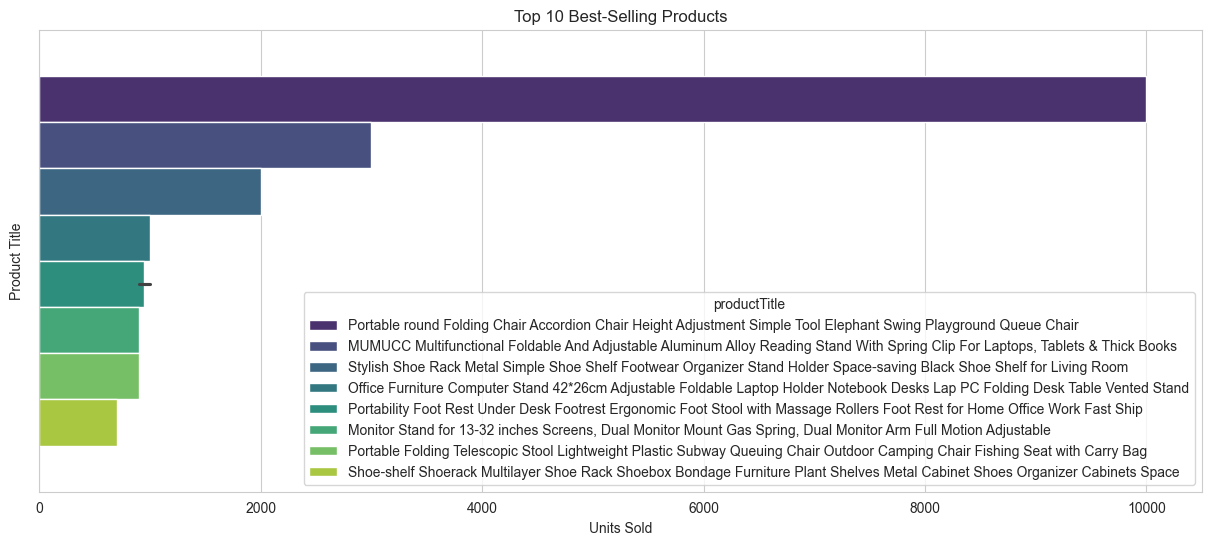

In [89]:
plt.figure(figsize=(15, 6))
sns.barplot(x=top_selling['sold'], hue=top_selling['productTitle'], palette='viridis')
plt.xlabel('Units Sold')
plt.ylabel('Product Title')
plt.title('Top 10 Best-Selling Products')
plt.show()


### Distribution of product price :

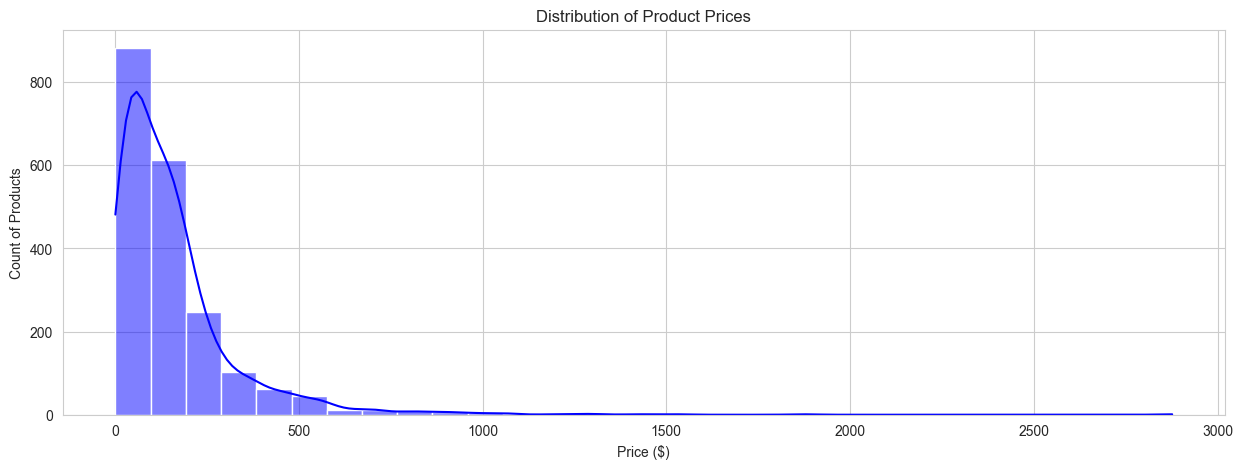

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Create a histogram of product prices
plt.figure(figsize=(15, 5))
sns.histplot(df['price'], bins=30, kde=True, color='blue')

# Add labels and title
plt.xlabel('Price ($)')
plt.ylabel('Count of Products')
plt.title('Distribution of Product Prices')

# Show the plot
plt.show()


##### From above graph we can see that there are many lower-priced items and a few expensive ones

### Impact of Discounts on Sales :

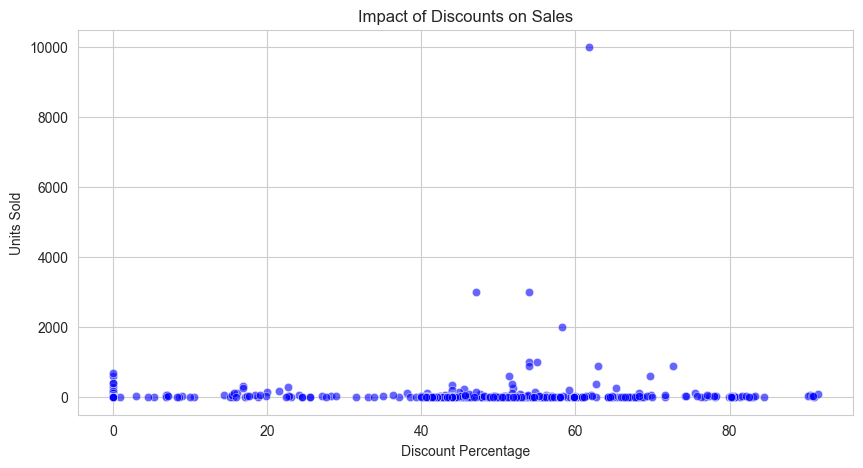

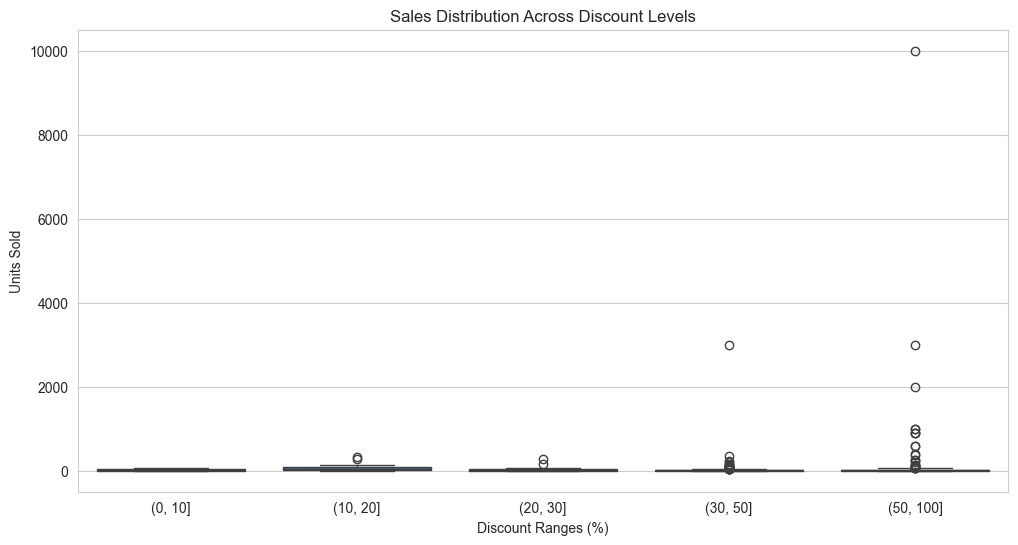

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the discount percentage
df['discount'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100

# Scatter plot: Discount vs. Sales
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['discount'], y=df['sold'], alpha=0.6, color='blue')
plt.xlabel('Discount Percentage')
plt.ylabel('Units Sold')
plt.title('Impact of Discounts on Sales')
plt.show()

# Box plot: Sales distribution across discount levels
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(df['discount'], bins=[0, 10, 20, 30, 50, 100]), y=df['sold'])
plt.xlabel('Discount Ranges (%)')
plt.ylabel('Units Sold')
plt.title('Sales Distribution Across Discount Levels')
plt.show()


#####      From above graph we can see that the discounts impact on sales

### Top Revenue-Generating Products :

In [74]:
# Sort products by revenue
df['revenue'] = df['price'] * df['sold']
top_revenue = df.sort_values(by='revenue', ascending=False).head(10)


In [75]:
df['price'] = df['price'].astype(float)
df['sold'] = df['sold'].astype(int)


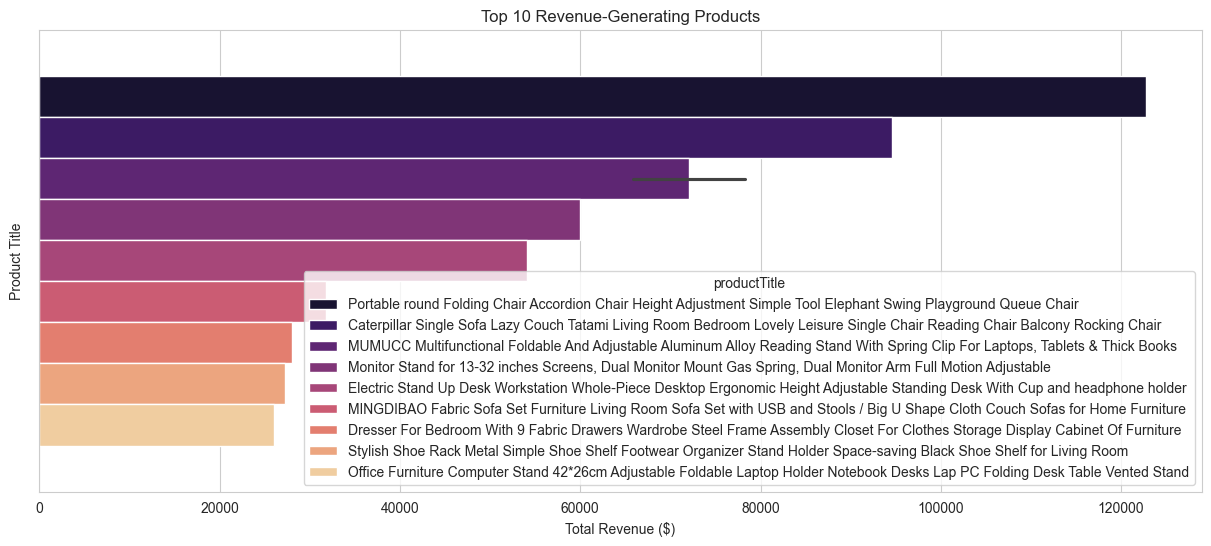

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure revenue column is calculated
df['revenue'] = df['price'] * df['sold']
top_revenue = df.sort_values(by='revenue', ascending=False).head(10)

# Plot highest revenue-generating products
plt.figure(figsize=(15, 6))
sns.barplot(x=top_revenue['revenue'], hue=top_revenue['productTitle'], palette='magma')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Product Title')
plt.title('Top 10 Revenue-Generating Products')
plt.show()


##### From above graph we can see that Top Revenue-Generating Products are Portable Chair and Caterpiller Sofa.

## 🏁 Conclusion :

The analysis shows that a few top-selling products drive most of the revenue, while lower-priced items dominate the market. Discounts boost sales but need optimization to maintain profitability. Focusing on high-demand products and strategic pricing will help maximize revenue. 